# Storytelling Data Visualization on Exchange Rates

Storytelling Data Visualization on Exchange Rates

there are two types of data visualization:
 * Exploratory data visualization: we create graphs for ourselves to better understand and explore data.
 * Explanatory data visualization: we create graphs for others to inform, make a point, or tell a story.

Throughout the Project, we focused on explanatory data visualization and learned the following:

* How to use information design principles (familiarity and maximizing the data-ink ratio) to create better graphs for an audience.
* About the elements of a story and how to create storytelling data visualizations using Matplotlib.
* How to guide the audience's attention with pre-attentive attributes.
* How to use Matplotlib built-in styles — with a case study on the FiveThirtyEight style.

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
exchange_rates = pd.read_csv("euro-daily-hist_1999_2022.csv")
exchange_rates.shape

(6456, 41)

In [3]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-12-15,1.6324,1.9558,5.4085,1.4653,0.9488,7.7812,NaN,24.477,7.4556,...,4.9710,NaN,11.2125,1.456,NaN,NaN,38.119,31.7965,1.0946,19.9801
1,2023-12-14,1.6288,1.9558,5.3349,1.4677,0.949,7.7866,NaN,24.408,7.4566,...,4.9712,NaN,11.18,1.4527,NaN,NaN,38.146,31.6673,1.0919,20.2693
2,2023-12-13,1.6452,1.9558,5.3609,1.4644,0.9452,7.7426,NaN,24.476,7.4566,...,4.9738,NaN,11.277,1.449,NaN,NaN,38.612,31.3399,1.0787,20.587
3,2023-12-12,1.6398,1.9558,5.3327,1.4656,0.9443,7.7447,NaN,24.42,7.4569,...,4.9732,NaN,11.2815,1.4479,NaN,NaN,38.543,31.3765,1.0804,20.4297
4,2023-12-11,1.642,1.9558,5.3169,1.4609,0.9478,7.7206,NaN,24.367,7.4563,...,4.9707,NaN,11.297,1.4454,NaN,NaN,38.402,31.1872,1.0757,20.5441


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

In [5]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar', 'Period\\Unit:': 'Time' }, inplace= True)

In [6]:
exchange_rates["Time"] = pd.to_datetime(exchange_rates["Time"])

In [7]:
exchange_rates.sort_values("Time", inplace = True)

In [8]:
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
6455,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
6454,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6453,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6452,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6451,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [9]:
euro_to_dollar = exchange_rates[["Time", "US_dollar"]].copy()
euro_to_dollar["US_dollar"].value_counts()

-         62
1.2276     9
1.1215     8
1.0888     7
1.0868     7
          ..
1.4304     1
1.4350     1
1.4442     1
1.4389     1
1.0804     1
Name: US_dollar, Length: 3769, dtype: int64

# To check "-" if it is avilable in more other countries

In [10]:
exchange_rates['[Danish krone ]'].value_counts()

-         62
7.4362    52
7.4360    48
7.4366    43
7.4365    42
          ..
7.4248     1
7.4234     1
7.4251     1
7.4309     1
7.456      1
Name: [Danish krone ], Length: 493, dtype: int64

In [11]:
exchange_rates['[Canadian dollar ]'].value_counts()

-         62
1.4679     9
1.5601     8
1.4931     8
1.4643     8
          ..
1.5090     1
1.5417     1
1.5980     1
1.5945     1
1.487      1
Name: [Canadian dollar ], Length: 3092, dtype: int64

In [12]:
exchange_rates['[Singapore dollar ]'].value_counts()

-         62
1.6158    10
1.5921     8
1.6014     8
1.5920     8
          ..
2.0750     1
2.0767     1
2.0779     1
2.0896     1
1.456      1
Name: [Singapore dollar ], Length: 3937, dtype: int64

In [13]:
exchange_rates['[Swedish krona ]'].value_counts()

-          62
9.2460      7
9.1930      6
9.1940      6
9.2400      6
           ..
10.8125     1
10.7200     1
10.8400     1
10.9135     1
11.2125     1
Name: [Swedish krona ], Length: 5013, dtype: int64

In [14]:
# Ignore the "-"

euro_to_dollar = euro_to_dollar[euro_to_dollar["US_dollar"] != "-"]
euro_to_dollar["US_dollar"] = euro_to_dollar["US_dollar"].astype(float)

In [15]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 6455 to 0
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6394 non-null   datetime64[ns]
 1   US_dollar  6394 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 149.9 KB


In [16]:
6456-62

6394

# Rolling Mean

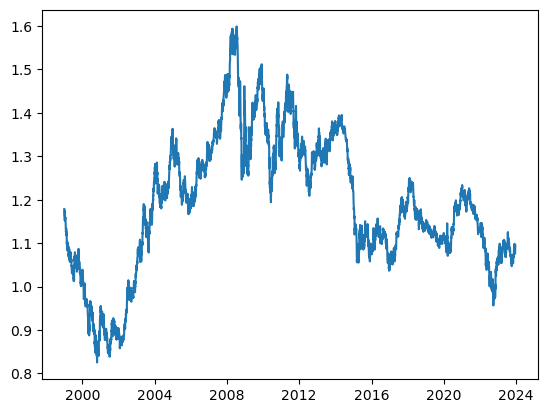

In [17]:
plt.plot(euro_to_dollar["Time"], euro_to_dollar["US_dollar"])

plt.show()

When examining the shape of the line, one can observe numerous small fluctuations instead of a smooth curve. These fluctuations, however, carry significance as they visually represent the day-to-day variations in the exchange rate. The rate experiences regular oscillations, showcasing a pattern of upward and downward movements. Notably, the rate tends to exhibit more distinct trends over extended periods, such as months or years.

Depending on our objectives, it might be undesirable to display the daily fluctuations on the graph. If our goal is to conceal this variability and emphasize only the longer-term trends, we can achieve this by employing the rolling mean, also referred to as the moving average.

In [18]:
values = pd.DataFrame()
values["daily_values"] = pd.Series(range(1, 20, 2))
values

,daily_values
0,1
1,3
2,5
3,7
4,9
5,11
6,13
7,15
8,17
9,19


In [19]:
values["rolling_mean_2"] = values["daily_values"].rolling(2).mean()

In [20]:
values

,daily_values,rolling_mean_2
0,1,NaN
1,3,2.0
2,5,4.0
3,7,6.0
4,9,8.0
5,11,10.0
6,13,12.0
7,15,14.0
8,17,16.0
9,19,18.0


In [21]:
values["rolling_mean_3"] = values["daily_values"].rolling(3).mean()
values["rolling_mean_5"] = values["daily_values"].rolling(5).mean()
values

,daily_values,rolling_mean_2,rolling_mean_3,rolling_mean_5
0,1,NaN,NaN,NaN
1,3,2.0,NaN,NaN
2,5,4.0,3.0,NaN
3,7,6.0,5.0,NaN
4,9,8.0,7.0,5.0
5,11,10.0,9.0,7.0
6,13,12.0,11.0,9.0
7,15,14.0,13.0,11.0
8,17,16.0,15.0,13.0
9,19,18.0,17.0,15.0


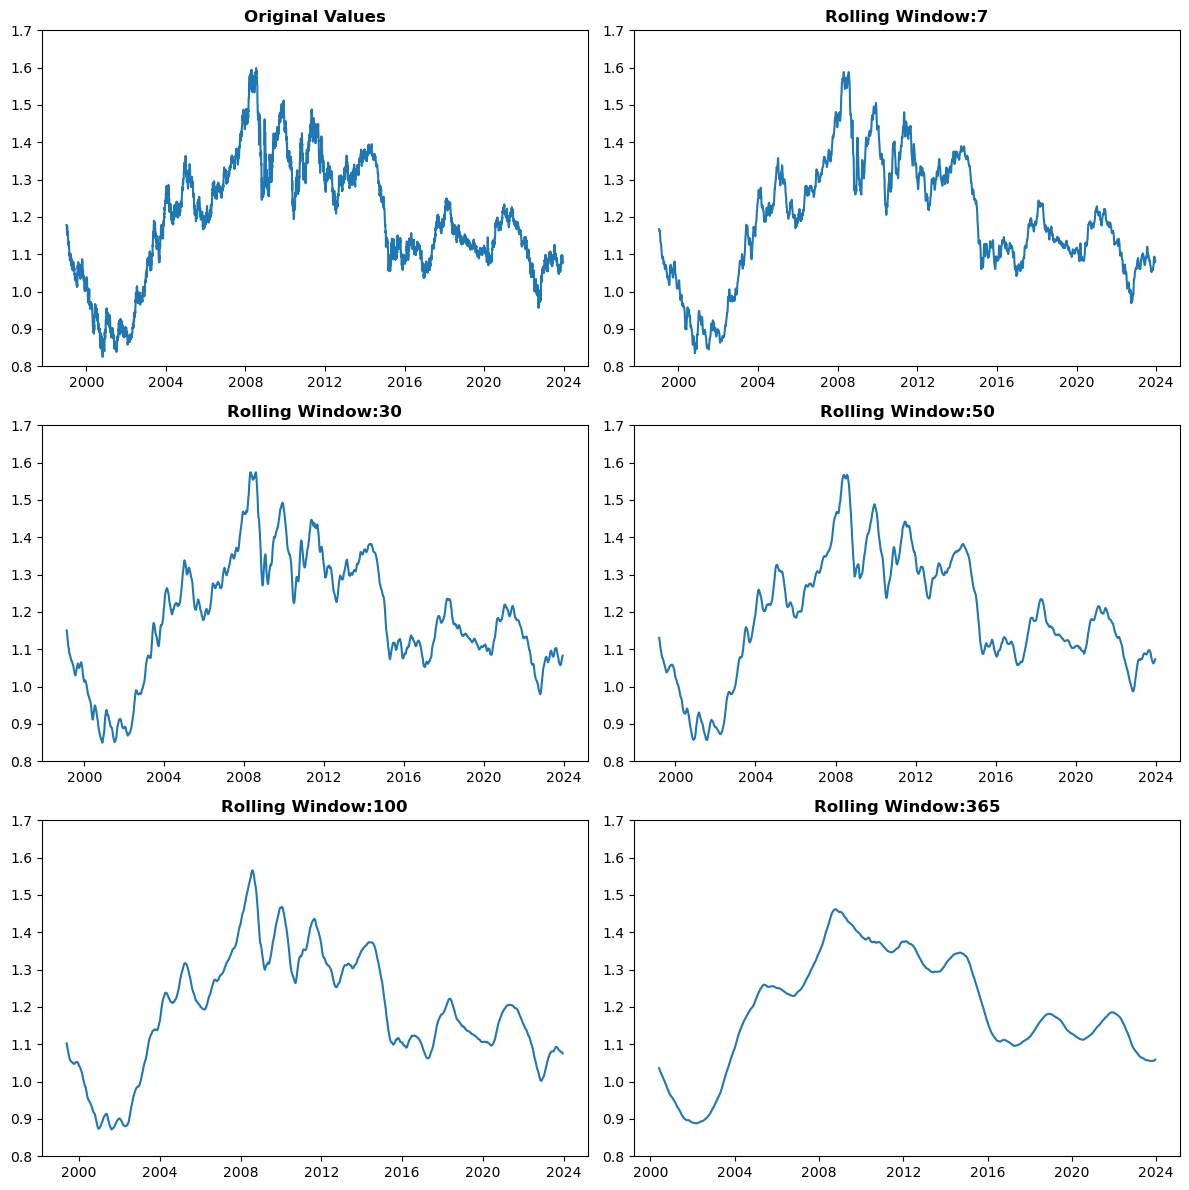

In [22]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.plot(euro_to_dollar["Time"], euro_to_dollar["US_dollar"])
plt.title("Original Values", weight="bold")
plt.ylim(0.8,1.7) # Set the y limit here

for i, rolling_mean in zip([2, 3, 4, 5, 6], [7, 30, 50, 100, 365]):
    plt.subplot(3, 2, i)
    plt.plot(euro_to_dollar["Time"], euro_to_dollar["US_dollar"].rolling(rolling_mean).mean())
    plt.title("Rolling Window:" + str(rolling_mean), weight="bold")
    plt.ylim(0.8,1.7)  # Set the y limit here

plt.tight_layout()  # Auto-adjusts the space between subplots
plt.show()


# Set y-axis limit on the basis of min and max value of US_dollar

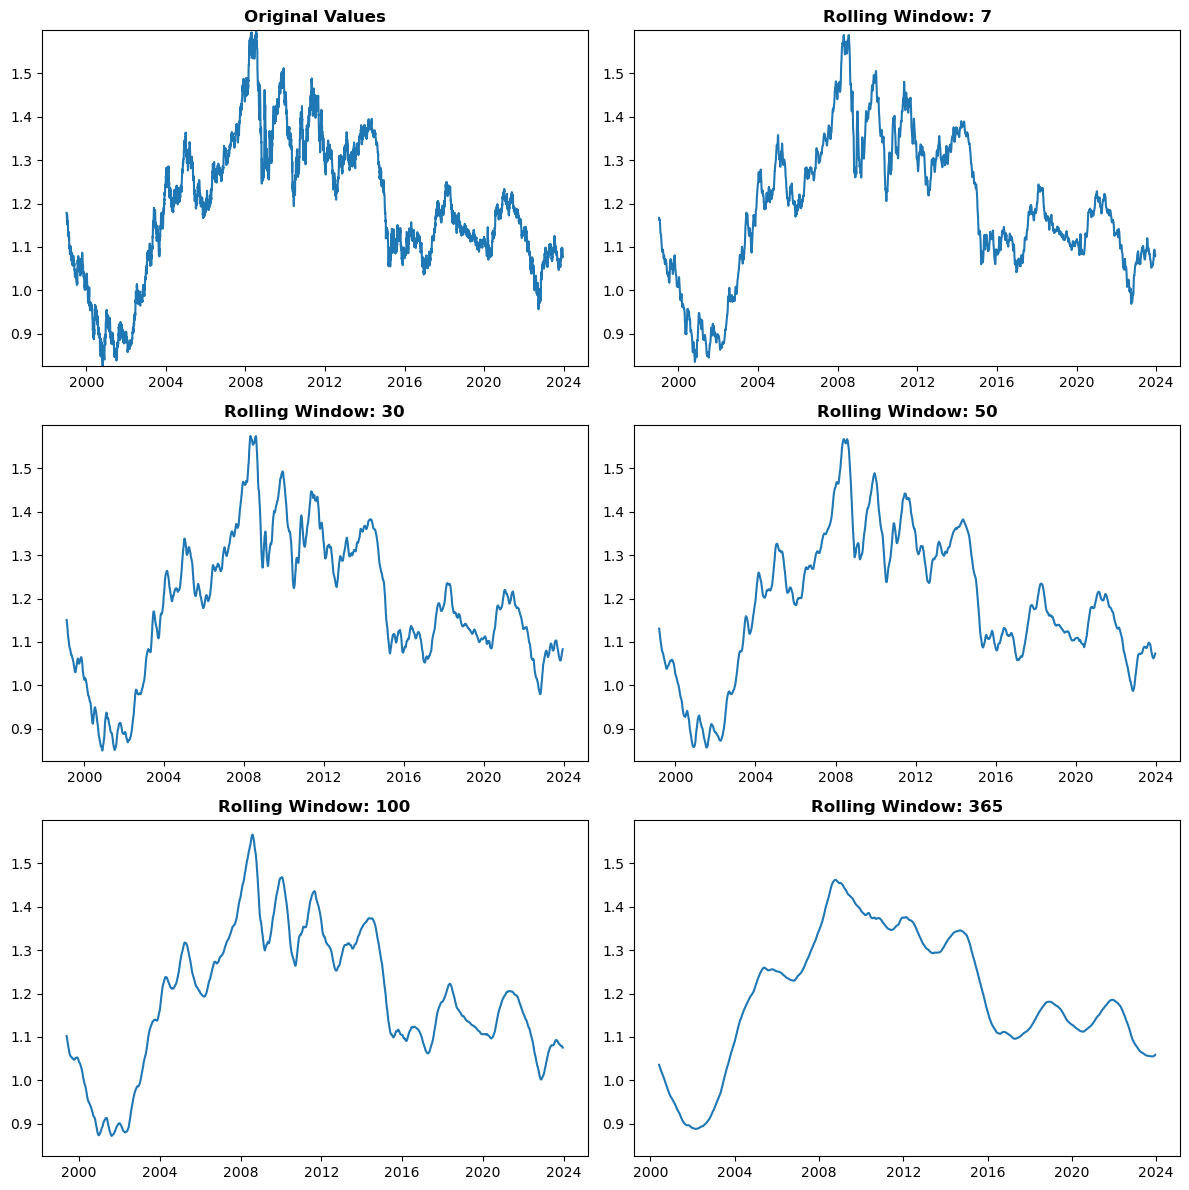

In [23]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.plot(euro_to_dollar["Time"], euro_to_dollar["US_dollar"])
plt.title("Original Values", weight="bold")
plt.ylim(euro_to_dollar["US_dollar"].min(), euro_to_dollar["US_dollar"].max() )  # Set the y-axis limit here

for i, rolling_mean in zip([2, 3, 4, 5, 6], [7, 30, 50, 100, 365]):
    plt.subplot(3, 2, i)
    plt.plot(euro_to_dollar["Time"], euro_to_dollar["US_dollar"].rolling(rolling_mean).mean())
    plt.title(f"Rolling Window: {rolling_mean}", weight="bold")
    
    # Set y limit on the basis of min and max value of US_dollar
    plt.ylim(euro_to_dollar["US_dollar"].min(), euro_to_dollar["US_dollar"].max())  

    
plt.tight_layout()  # Auto-adjusts the space between subplots
plt.show()

# Let's explore the historical events and crises about the Euro to USD exchange rate over the years.

Here's how we can structure our storytelling:

• We show how the euro-dollar rate has changed duri-rg the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can two a line plot

• We show how the euro-dollar rate changod daring the 2007-2008 financial crisis. We con also show the data for 2008 and 200910 companson we can use a lino plot.

• We show comparatively how the eurodollar rale changed under the eel three US presidents (George W. Bush (2001.2009). Berea Obarne (2009.2017). and Dcaald Trump (2017-2021)). We can use a one plot. 

• 


In [24]:
# Brief summary of the dataset, highlighting the time range

In [25]:
start_date = exchange_rates['Time'].min()
end_date = exchange_rates['Time'].max()

print(f"The dataset covers the period from {start_date} to {end_date}.")

The dataset covers the period from 1999-01-04 00:00:00 to 2023-12-15 00:00:00.


In [26]:
euro_to_dollar["rolling_mean_30"] = euro_to_dollar["US_dollar"].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean_30
6455,1999-01-04,1.1789,NaN
6454,1999-01-05,1.1790,NaN
6453,1999-01-06,1.1743,NaN
6452,1999-01-07,1.1632,NaN
6451,1999-01-08,1.1659,NaN
...,...,...,...
4,2023-12-11,1.0757,1.080143
3,2023-12-12,1.0804,1.080760
2,2023-12-13,1.0787,1.081593
1,2023-12-14,1.0919,1.082453


# Storytelling Data Visualization

Euro-Dollar Financial Crisis 2007 - 2008

In [27]:
financial_crisis_2006_2009 = euro_to_dollar.copy()[(euro_to_dollar["Time"].dt.year >= 2006) & (euro_to_dollar["Time"].dt.year <= 2009)]
financial_crisis_2007_2008 = euro_to_dollar.copy()[(euro_to_dollar["Time"].dt.year >= 2007) & (euro_to_dollar["Time"].dt.year <= 2008)]

In [28]:
financial_crisis_2006_2009

,Time,US_dollar,rolling_mean_30
4630,2006-01-02,1.1826,1.183087
4629,2006-01-03,1.1875,1.183300
4628,2006-01-04,1.2083,1.184573
4627,2006-01-05,1.2088,1.185613
4626,2006-01-06,1.2093,1.186647
...,...,...,...
3592,2009-12-24,1.4398,1.477640
3590,2009-12-28,1.4405,1.476097
3589,2009-12-29,1.4433,1.474323
3588,2009-12-30,1.4338,1.472533


In [29]:
financial_crisis_2007_2008

,Time,US_dollar,rolling_mean_30
4369,2007-01-02,1.3270,1.314257
4368,2007-01-03,1.3231,1.315780
4367,2007-01-04,1.3106,1.316663
4366,2007-01-05,1.3084,1.317563
4365,2007-01-08,1.3006,1.317963
...,...,...,...
3854,2008-12-23,1.3978,1.303717
3853,2008-12-24,1.4005,1.308633
3850,2008-12-29,1.4270,1.314450
3849,2008-12-30,1.4098,1.319193


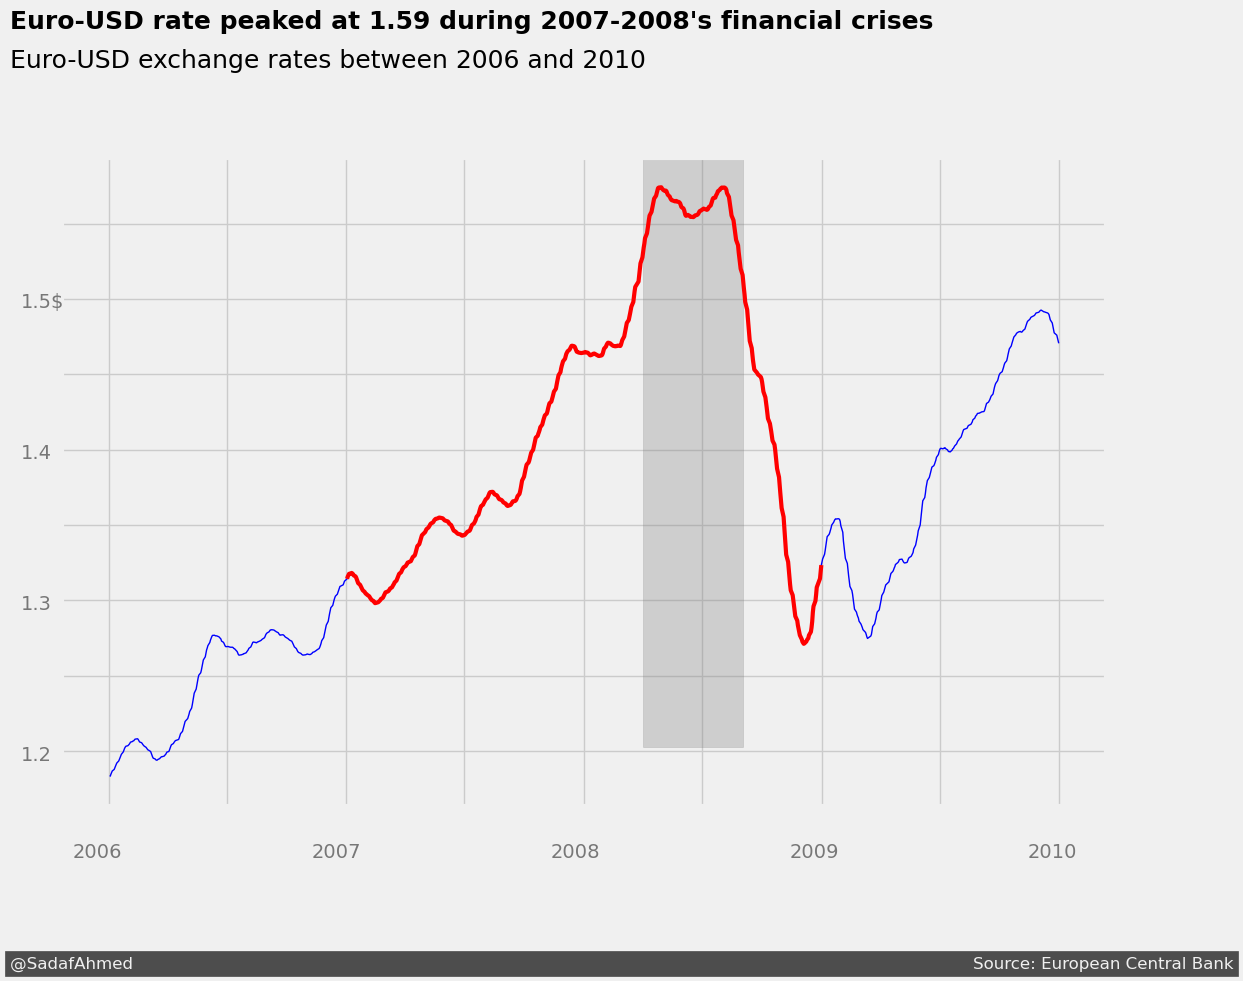

In [30]:
import matplotlib.style as styl

styl.use("fivethirtyeight")

# Adding the plot
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(financial_crisis_2006_2009["Time"],financial_crisis_2006_2009["rolling_mean_30"], color= 'blue',linewidth=1)

# Highlighting the 2007-2008 
ax.plot(financial_crisis_2007_2008["Time"],financial_crisis_2007_2008["rolling_mean_30"],color='red', linewidth=3)


# Adding separate tick labels
ax.set_xticklabels([])

x= 0.01
for year in ["2006", "2007", "2008", "2009", "2010"]:
    ax.text(x,-0.08,year,alpha=0.5, transform = plt.gca().transAxes)
    x+=0.2288

ax.set_yticklabels([]) 
y=0.07
for rate in ['1.2','1.3','1.4','1.5$']:
    ax.text(-0.04, y, rate, alpha=0.5,transform= plt.gca().transAxes)
    y+= 0.2333
    
# Adding a title and a subtitle   
ax.text(-0.05,1.2,"Euro-USD rate peaked at 1.59 during 2007-2008's financial crises",
        weight='bold', fontsize= 18, transform = plt.gca().transAxes)
ax.text(-0.05,1.14,"Euro-USD exchange rates between 2006 and 2010", fontsize=18,
        transform = plt.gca().transAxes)

# Adding a signature
ax.text(-0.05,-0.25, "@SadafAhmed" + '  '*80 + 'Source: European Central Bank',
        color = '#f0f0f0',
        backgroundcolor = '#4d4d4d', size=12, transform = plt.gca().transAxes)

# Highlighting the peak of the crisis
ax.axvspan(xmin=pd.to_datetime("2008-04-01"), xmax=pd.to_datetime("2008-09-01"), ymin=0.09,
           alpha=0.3, color='grey')


plt.show()

# Corona

In [59]:
Corona_crisis2020 = euro_to_dollar.loc[(euro_to_dollar["Time"]>= "2020-01-01") & (euro_to_dollar["Time"]<= "2020-12-31")]

Corona_crisis = euro_to_dollar.loc[(euro_to_dollar["Time"]>= "2016-01-01") & (euro_to_dollar["Time"]<= "2019-12-31")]


In [32]:
Corona_crisis["rolling_mean_30"].value_counts(bins = 5).sort_index()

(1.0510000000000002, 1.089]    146
(1.089, 1.126]                 354
(1.126, 1.162]                 257
(1.162, 1.199]                 179
(1.199, 1.236]                  86
Name: rolling_mean_30, dtype: int64

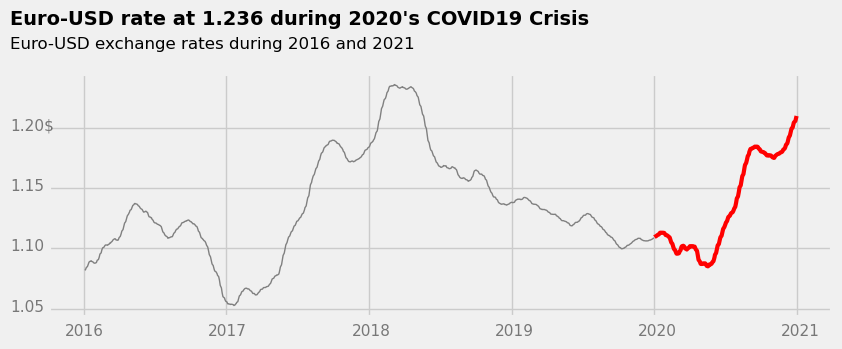

In [33]:
import matplotlib.style as style  

style.use("fivethirtyeight")  

# Adding the plot
fig, ax = plt.subplots(figsize=(9, 3))  

ax.plot(Corona_crisis["Time"], Corona_crisis["rolling_mean_30"],
        linewidth=1, color="grey")

# Highlighting the 2007 to 2008 period
ax.plot(Corona_crisis2020["Time"],
        Corona_crisis2020["rolling_mean_30"],
        linewidth=3, color="red")

ax.set_xticklabels([])

x = 0.02
for year in ["2016", "2017", "2018", "2019", "2020", "2021"]:
    ax.text(x, -0.08, year, alpha=0.5, fontsize=11,
            transform=plt.gca().transAxes)
    x += 0.183

ax.set_yticklabels([])

y = 0.02
for rate in ["1.05", "1.10", "1.15", "1.20$"]:  
    ax.text(-0.05, y, rate, alpha=0.5, fontsize=11,
            transform=plt.gca().transAxes)
    y += 0.248

# Adding a title and a subtitle
ax.text(-0.05, 1.2, "Euro-USD rate at 1.236 during 2020's COVID19 Crisis",
        weight="bold", transform=plt.gca().transAxes)

ax.text(-0.05, 1.1, "Euro-USD exchange rates during 2016 and 2021",
        size=12, transform=plt.gca().transAxes)

plt.show()


# USD during three US presidences

In [34]:
bush_obama_trump = euro_to_dollar.copy()[(euro_to_dollar["Time"].dt.year >= 2001) & (euro_to_dollar["Time"].dt.year < 2021)]
bush = bush_obama_trump.copy()[bush_obama_trump["Time"].dt.year < 2009]
obama = bush_obama_trump.copy()[(bush_obama_trump["Time"].dt.year >= 2009) & (bush_obama_trump["Time"].dt.year < 2017)]
trump = bush_obama_trump.copy()[(bush_obama_trump["Time"].dt.year >= 2017) & (bush_obama_trump["Time"].dt.year < 2021)]


In [35]:
bush["rolling_mean_30"].value_counts(bins = 5).sort_index()

(0.85, 0.996]     491
(0.996, 1.141]    176
(1.141, 1.285]    741
(1.285, 1.43]     406
(1.43, 1.574]     232
Name: rolling_mean_30, dtype: int64

In [36]:
obama["rolling_mean_30"].value_counts(bins = 5).sort_index()

(1.0550000000000002, 1.143]    477
(1.143, 1.231]                  60
(1.231, 1.318]                 534
(1.318, 1.405]                 717
(1.405, 1.493]                 262
Name: rolling_mean_30, dtype: int64

In [37]:
trump["rolling_mean_30"].value_counts(bins=5).sort_index()

(1.0510000000000002, 1.089]    124
(1.089, 1.126]                 295
(1.126, 1.162]                 241
(1.162, 1.199]                 267
(1.199, 1.236]                  95
Name: rolling_mean_30, dtype: int64

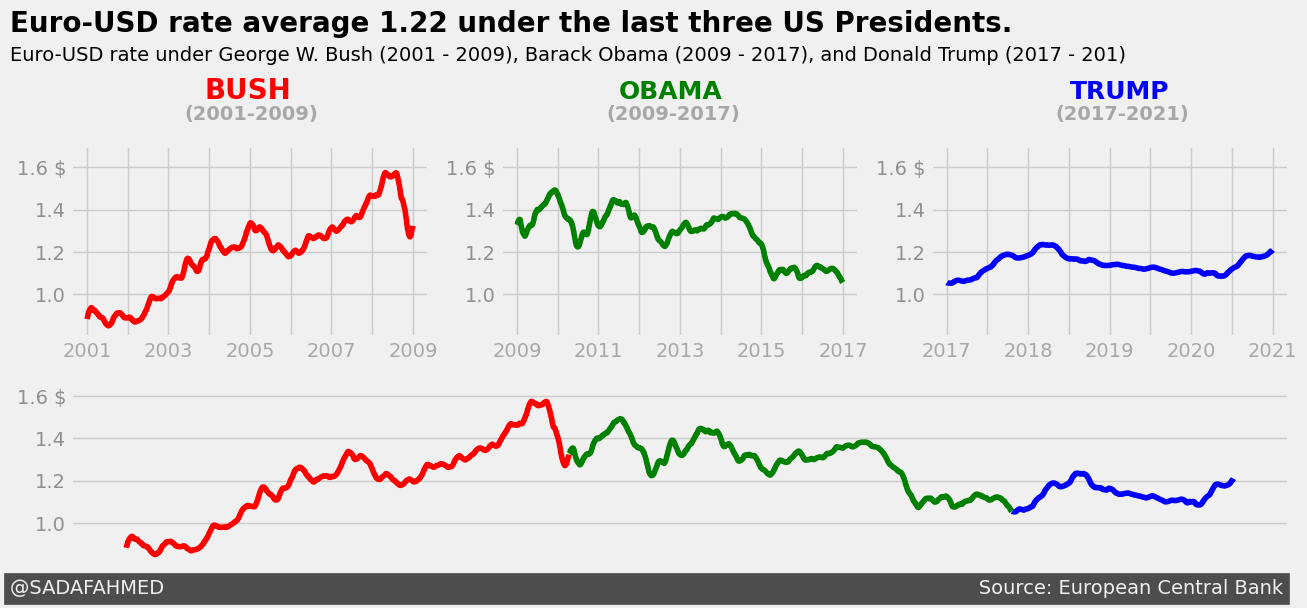

In [38]:
# Adding the fiveThirtyEight Style
style.use("fivethirtyeight") 

# Adding the subplots
plt.figure(figsize=(14,8))

#pattern 1

ax1 = plt.subplot(3,3,1)
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)

#pattern 2
ax4 = plt.subplot(3,1,2)

#pattern 3
axes= [ax1,ax2,ax3,ax4]

#changes to all subplot

for ax in axes:
    ax.set_ylim(0.8,1.7)
    ax.set_yticks([1.0,1.2,1.4,1.6])
    ax.set_yticklabels(["1.0", "1.2", "1.4", "1.6 $"], alpha=0.4)
    
# AX1: Bush
ax1.plot(bush["Time"], bush["rolling_mean_30"],color = "red" )
ax1.set_xticklabels([" ", "2001"," ", "2003", " ", "2005", " ", "2007", " ", "2009"], alpha=0.3)
ax1.text(0.11, 2.45, "BUSH", fontsize=20, weight="bold", color="red", transform = plt.gca().transAxes)
ax1.text(0.093, 2.34, "(2001-2009)", weight="bold", alpha=0.3, transform = plt.gca().transAxes)

# AX2: Obama
ax2.plot(obama["Time"], obama["rolling_mean_30"],color = "green" )
ax2.set_xticklabels([" ", "2009"," ", "2011", " ", "2013", " ", "2015", " ", "2017"], alpha=0.3)
ax2.text(0.45, 2.45, "OBAMA", fontsize=18, weight="bold", color="green", transform = plt.gca().transAxes)
ax2.text(0.44, 2.34, "(2009-2017)", weight="bold", alpha=0.3, transform = plt.gca().transAxes)

# AX3: Trump
ax3.plot(trump["Time"], trump["rolling_mean_30"],color = "blue" )
ax3.set_xticklabels(["2017"," ", "2018", " ", "2019", " ", "2020", " ", "2021"], alpha=0.3)
ax3.text(0.82, 2.45, "TRUMP", fontsize=18, weight="bold", color="blue", transform = plt.gca().transAxes)
ax3.text(0.808, 2.34, "(2017-2021)", weight="bold", alpha=0.3, transform = plt.gca().transAxes)

# AX4: Bush-Obama-Trump
ax4.plot(bush["Time"], bush["rolling_mean_30"],color = "red" )
ax4.plot(obama["Time"], obama["rolling_mean_30"],color = "green" )
ax4.plot(trump["Time"], trump["rolling_mean_30"],color = "blue" )

ax4.set_xticks([])

# Adding a title and a subtitle
ax1.text(-0.05, 2.8, "Euro-USD rate average 1.22 under the last three US Presidents.", fontsize=20, weight="bold", transform= plt.gca().transAxes)
ax1.text(-0.05, 2.65, "Euro-USD rate under George W. Bush (2001 - 2009), Barack Obama (2009 - 2017), and Donald Trump (2017 - 201)",  fontsize=14, transform= plt.gca().transAxes)

# Adding a signature
ax.text(-0.05, -0.15, "@SADAFAHMED" + ' ' * 133 + 'Source: European Central Bank',
        color='#f0f0f0',
        backgroundcolor='#4d4d4d',
        size=14, transform=plt.gca().transAxes)

#plt.tight_layout()
plt.show()

# Let's Explore some more events

# 1) Impact of the Dot-Com Bubble (2000-2001) on the Euro to USD exchange rate

The Dot-Com Bubble, which occurred roughly from 1995 to 2000, refers to the rapid rise and subsequent crash of stock prices in the technology sector, particularly related to internet-based companies. The burst of the Dot-Com Bubble had several impacts on various aspects of the economy, including exchange rates. 

# Let's see did this affact the Euro - USD?

In [39]:
Dot_Com_Bubble_2k_2k1 = euro_to_dollar.copy()[(euro_to_dollar["Time"].dt.year >= 2000) & (euro_to_dollar["Time"].dt.year <= 2001)]
Dot_Com_Bubble_99_2k3 = euro_to_dollar.copy()[(euro_to_dollar["Time"].dt.year >= 1999) & (euro_to_dollar["Time"].dt.year <= 2003)]

In [40]:
Dot_Com_Bubble_2k_2k1

,Time,US_dollar,rolling_mean_30
6195,2000-01-03,1.0090,1.012743
6194,2000-01-04,1.0305,1.012723
6193,2000-01-05,1.0368,1.012900
6192,2000-01-06,1.0388,1.013477
6191,2000-01-07,1.0284,1.013777
...,...,...,...
5682,2001-12-20,0.8973,0.888723
5681,2001-12-21,0.8943,0.888767
5680,2001-12-24,0.8798,0.888363
5677,2001-12-27,0.8823,0.888300


In [41]:
Dot_Com_Bubble_99_2k3.tail()

,Time,US_dollar,rolling_mean_30
5159,2003-12-23,1.2392,1.205407
5158,2003-12-24,1.2407,1.208097
5155,2003-12-29,1.2499,1.210827
5154,2003-12-30,1.2496,1.213263
5153,2003-12-31,1.2630,1.216023


In [42]:
Dot_Com_Bubble_99_2k3["rolling_mean_30"].value_counts(bins = 5).sort_index()

(0.848, 0.923]    441
(0.923, 0.996]    270
(0.996, 1.07]     250
(1.07, 1.143]     189
(1.143, 1.216]     99
Name: rolling_mean_30, dtype: int64

In [43]:
Dot_Com_Bubble_2k_2k1["rolling_mean_30"].value_counts(bins=5).sort_index()

(0.849, 0.883]    130
(0.883, 0.917]    178
(0.917, 0.95]     117
(0.95, 0.984]      39
(0.984, 1.017]     45
Name: rolling_mean_30, dtype: int64

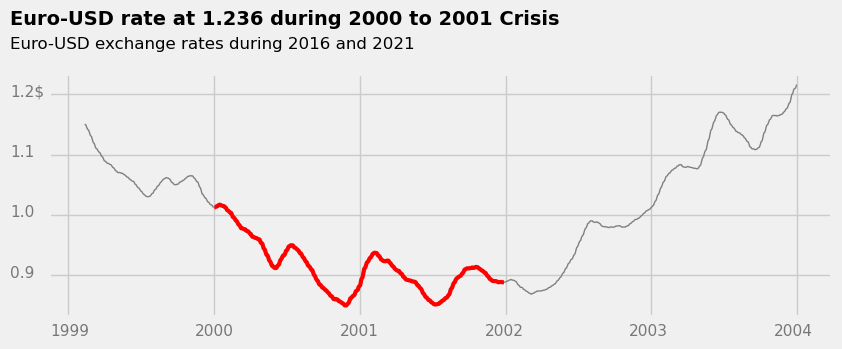

In [44]:
import matplotlib.style as style  

style.use("fivethirtyeight")  

# Adding the plot
fig, ax = plt.subplots(figsize=(9, 3))  

ax.plot(Dot_Com_Bubble_99_2k3["Time"], Dot_Com_Bubble_99_2k3["rolling_mean_30"],
        linewidth=1, color="grey")

# Highlighting the 2007 to 2008 period
ax.plot(Dot_Com_Bubble_2k_2k1["Time"],
        Dot_Com_Bubble_2k_2k1["rolling_mean_30"],
        linewidth=3, color="red")

ax.set_xticklabels([])

x = 0.001
for year in ["1999", "2000", "2001", "2002", "2003", "2004"]:
    ax.text(x, -0.08, year, alpha=0.5, fontsize=11,
            transform=plt.gca().transAxes)
    x += 0.185

ax.set_yticklabels([])

y = 0.16
for rate in ["0.9", "1.0", "1.1","1.2$"]:  
    ax.text(-0.05, y, rate, alpha=0.5, fontsize=11,
            transform=plt.gca().transAxes)
    y += 0.248

# Adding a title and a subtitle
ax.text(-0.05, 1.2, "Euro-USD rate at 1.236 during 2000 to 2001 Crisis",
        weight="bold", transform=plt.gca().transAxes)

ax.text(-0.05, 1.1, "Euro-USD exchange rates during 2016 and 2021",
        size=12, transform=plt.gca().transAxes)

plt.show()


# Conclussion:

The examination of the Euro to USD exchange rate between 2000 and 2001 suggests that the US dollar did not exhibit initial strength at the beginning of 2000. However, it gradually gained strength over time. In the early part of 2001, there was a reversal, and the US dollar began to weaken again. By the end of 2001, it had surpassed the Euro in value.

**Factors:**

In 2000 to 2001, the US dollar was stronger than the euro. Factors contributing to this were economic, such as a strong US economy and political stability, as well as interest rates. The US' central bank, the Federal Reserve, maintained a tight monetary policy during this time, which also contributed to the dollar's stronger position. A weak euro market and massive government spending was also a significant factor, resulting in a dark economic period for the eurozone.


**But it's worth noting that the Euro's position has updated over time.**

# Eurozone Crisis (2010-2012):

The Eurozone crisis of 2010-2012 was a complex economic and financial crisis that primarily affected several European countries that use the euro as their currency. One of the key aspects of this crisis was the sovereign debt crisis, which emerged when certain Eurozone member countries faced significant challenges in servicing their sovereign debts.

# Let see how did this affact the Euro to USD exchange rate:

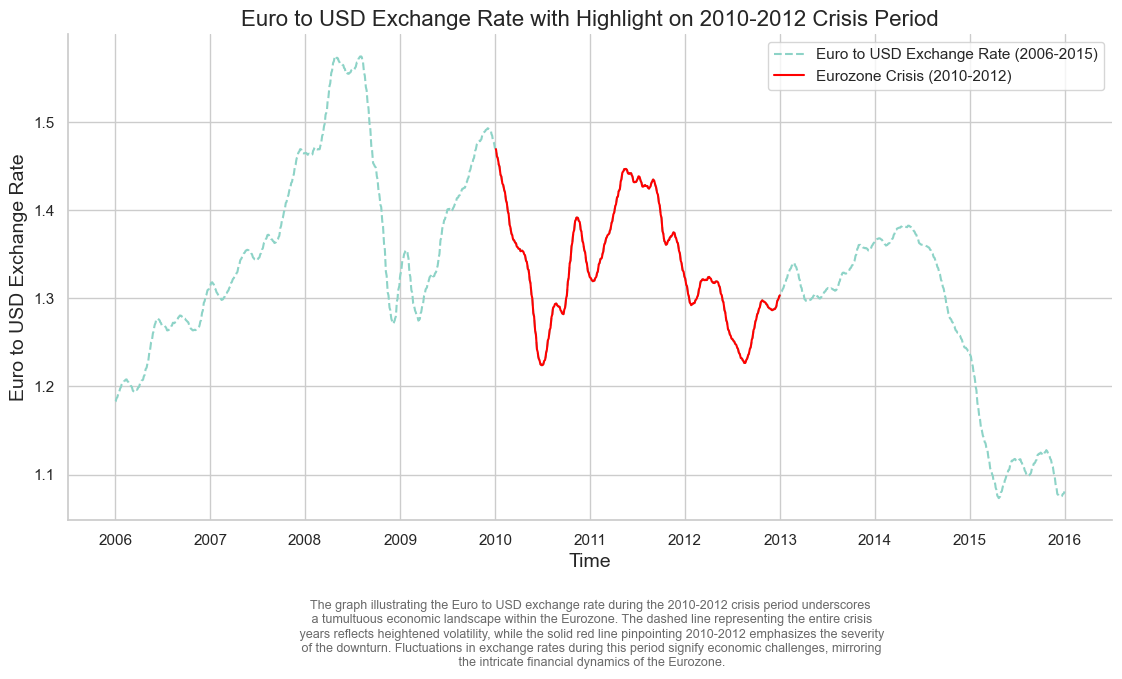

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and color palette
sns.set(style="whitegrid", palette="Set3")

# Assuming euro_to_dollar is your DataFrame

# Filter the data for the Eurozone crisis period (2006-2015) and 2010-2012
crisis_eurozone = euro_to_dollar.copy()[(euro_to_dollar["Time"].dt.year >= 2006) & (euro_to_dollar["Time"].dt.year <= 2015)]
eurozone2010_2012 = euro_to_dollar.copy()[(euro_to_dollar["Time"].dt.year >= 2010) & (euro_to_dollar["Time"].dt.year <= 2012)]

# Create a line plot for the entire crisis period with a dashed line
plt.figure(figsize=(12, 6))
sns.lineplot(crisis_eurozone["Time"], crisis_eurozone["rolling_mean_30"], label='Euro to USD Exchange Rate (2006-2015)', linestyle='dashed')

# Highlight the 2010-2012 period with a solid red line
sns.lineplot(eurozone2010_2012["Time"], eurozone2010_2012["rolling_mean_30"], color='red', label='Eurozone Crisis (2010-2012)')

# Customize labels and title
plt.xlabel('Time', fontsize=14)
plt.ylabel('Euro to USD Exchange Rate', fontsize=14)
plt.title('Euro to USD Exchange Rate with Highlight on 2010-2012 Crisis Period', fontsize=16)


# Adding a conclusion inside the chart
plt.text(0.5, -0.30, '''The graph illustrating the Euro to USD exchange rate during the 2010-2012 crisis period underscores\n a tumultuous economic landscape within the Eurozone. The dashed line representing the entire crisis\n years reflects heightened volatility, while the solid red line pinpointing 2010-2012 emphasizes the severity\n of the downturn. Fluctuations in exchange rates during this period signify economic challenges, mirroring\n the intricate financial dynamics of the Eurozone.''',
         horizontalalignment="center", fontsize=9, transform=plt.gca().transAxes, color='dimgrey')

# Add legend
plt.legend()

# Add grid lines and remove unnecessary spines
sns.despine()

# Show the plot
plt.show()


# Conclussion:
    

The Euro to USD exchange rate data from 1999 to 2023 reveals a complex economic narrative shaped by various crises within the Eurozone. The graph illustrates notable peaks and troughs, each corresponding to distinct crisis periods. The 2008 global financial crisis, the Eurozone debt crisis of 2010-2012 while recovery phases follow, reflecting resilience in the Euro's value. Upswings often coincide with positive economic indicators and policy interventions, while downturns align with financial instability, political uncertainties, and sovereign debt concerns.